Further:

concepts: 
machine Learning, data mining / process mining(new area), reinforcement learning(supervised learning), feature = attribute + value

exercise answers 

“Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow, 2nd Edition,
by Aurélien Géron (O’Reilly). Copyright 2019 Aurélien Géron, 978-1-492-
03264-9.”

git command:
ssh-keygen is a standard component of the Secure Shell protocol


'''

Exercises 

1. How would you define Machine Learning? 
Machine learning is the field of study that gives computers the ability to learn without explicitly programmed.
Machine learning is the science of programming computers so they can learn from data.

2. Can you name four types of problems where it shines? 
content recommendation, speech recognition, image recognition, automatic car driving, 

3. What is a labeled training set? 
the training set that is with the desired solutions. 
 
4. What are the two most common supervised tasks?
regression(linear regression)calssification, (logistic regression).

5. Can you name four common unsupervised tasks? 
*clustering, association rule learning, anomaly detection, dimensionality reduction(PCA).

6. What type of Machine Learning algorithm would you use to allow a robot to walk in various unknown terrains? 
unsupervided.

7. What type of algorithm would you use to segment your customers into multiple groups?
unsupervised. 

8. Would you frame the problem of spam detection as a supervised learning problem or an unsupervised learning problem? 
unsupervised. (semi-supervised: put labels for the spam)

9. What is an online learning system? 
train the system incrementally by feeding it data instances sequentially. incremental learning.

10. What is out-of-core learning? 
*train systems on huge dataset that can not fit in one machine's memory. load part of the data train on the data, reapeat.

11. What type of learning algorithm relies on a similarity measure to make predictions? 
*instance based learning. comparing instances similarity instead of explicit model generalization.nearest neighbor algorithm.

12. What is the difference between a model parameter and a learning algorithms hyperparameter? 
A hyperparemeter is a parameter of the learning algorithm instead of the model. It is not affected by the learning algorithm itself. It must be set prior to training and remain constant during the trainng. 

13. What do model-based learning algorithms search for? What is the most common strategy they use to succeed? How do they make predictions? 
*Generalization from a set of examples. Build a model of these examples. Use the model to make predictions. 

14. Can you name four of the main challenges in Machine Learning?
bad data: insufficient quantity of traning data, nonrepresentative training dats(too small: sampling noise; too big: sampling bias), poor quality data, irrelevant features. bad algorithm:: overfiting(high variance, data distribute), underfitting(high bias, model generalize)

15. If your model performs great on the training data but generalizes poorly to new instances, what is happening? Can you name three possible solutions?
*The problem is overfitting. choose the model with fewer parameters (regularization) , input more training data, reduce the noise in the training set. 
 
16. What is a test set and why would you want to use it? 
You can split the data into training set and test set. The test set is unsed to evaluate the model.

17. What is the purpose of a validation set?
Validation set is the a second handout set.

18. What can go wrong if you tune hyperparameters using the test set? 
You adapt he model and the hyperparameters to produce the best model for that set instaed of general set.

19. What is cross-validation and why would you prefer it to a validation set? 
The training set is split into complementary subsets, and each model is trained against a different combination of these subsets and validated against the remaining parts. It is used to acoid “wasting” too much traning data in validation sets . 

'''


In [1]:
from __future__ import division, print_function, unicode_literals
## to support both python2 and python3

import os 
import numpy as np 
np.random.seed(42)
%matplotlib inline 
import matplotlib as mpl 
import matplotlib.pyplot as plt 
import pandas as pd 
import sklearn

import warnings
warnings.filterwarnings(action='ignore', message='^internal gelsd')
## ignore useless warning(see SciPy issue #5998)

In [2]:
PROJECT_ROOT_DIR = '.'
CHAPTER_ID = '01'
def safe_fig(fig_id, tight_layout=True):
    path = os.path.join(PROJECT_ROOT_DIR, 'img', CHAPTER_ID, fig_id + '.png')
    print('saving figures', fig_id)
    if tight_layout: 
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)

In [3]:
oecd_bli = pd.read_csv('dataset/lifesat/oecd_bli_2015.csv', thousands=',')
gdp_per_capita = pd.read_csv('dataset/lifesat/gdp_per_capita.csv',  thousands=',', delimiter = '\t',
                             encoding = 'latin1', na_values='n/a' )
## thousands separator: number
## delimiter separator: sep 
## standard encoding: file 
## na_values = represent missing value: there are missing values 
## Organisation for Economic Co-operation and Development, better life index 

In [4]:
def prepare_country_stats(oecd_bli, gdp_per_capita):
    oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]
    oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")
    gdp_per_capita.rename(columns={"2015": "GDP per capita"}, inplace=True)
    gdp_per_capita.set_index("Country", inplace=True)
    full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita,
                                  left_index=True, right_index=True)
    full_country_stats.sort_values(by="GDP per capita", inplace=True)
    remove_indices = [0, 1, 6, 8, 33, 34, 35]
    keep_indices = list(set(range(36)) - set(remove_indices))
    return full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[keep_indices]

In [5]:
country_stats = prepare_country_stats(oecd_bli, gdp_per_capita)
X = np.c_[country_stats['GDP per capita']]
y = np.c_[country_stats['Life satisfaction']]
## numpy.c_ = <numpy.lib.index_tricks.CClass object>¶

In [6]:
from sklearn import linear_model
lin_reg_model = linear_model.LinearRegression()

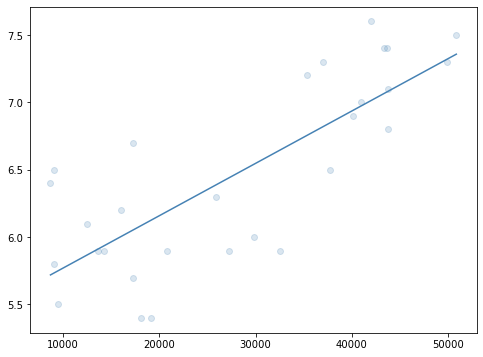

In [7]:
lin_reg_model.fit(X, y)

plt.figure(figsize=(8, 6))
plt.scatter(X, y, alpha=0.2, color='steelblue')
_=plt.plot(X, lin_reg_model.predict(X), color='steelblue' )

In [8]:
X_new = [[22587]]
lin_reg_model.predict(X_new)

array([[6.25984414]])

In [9]:
## pandas merge, join, concatenate 
## pd.concat(), a useful shortcut is pd.append()
## low peformance 
## pd.merge(left, right, how = 'inner'), with a dataframe style join 
## high performance in-memory join operations, very similar to SQL
## pd.DataFrame.join(), left.join(right, how = 'inner'), join columns of anther DataFrame 